In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm
from tree import Tree
np.random.seed(2024)

# The Exp3 Algorithm

\begin{aligned}
&\textbf{Input: } n, k, \eta \\
&\text{Set } \hat{S}_i^0 = 0 \text{ for all } i \in \{1, \dots, k\} \\
&\textbf{for } t = 1, \dots, n \textbf{ do} \\
&\quad \text{Calculate the sampling distribution } P_t: \\
&\quad \quad P_{i,t} = \frac{\exp\left(\eta \hat{S}_i^{t-1}\right)}{\sum_{j=1}^k \exp\left(\eta \hat{S}_j^{t-1}\right)} \\
&\quad \text{Sample } A_t \sim P_t \text{ and observe reward } X_t \\
&\quad \text{Update } \hat{S}_i^t \text{ accordingly.} : \hat{S}_i^t = \hat{S}_i^{t-1} + \frac{X_t}{P_{i,t}}\\
&\textbf{end for}
\end{aligned}


100%|██████████| 100/100 [00:01<00:00, 85.65it/s]


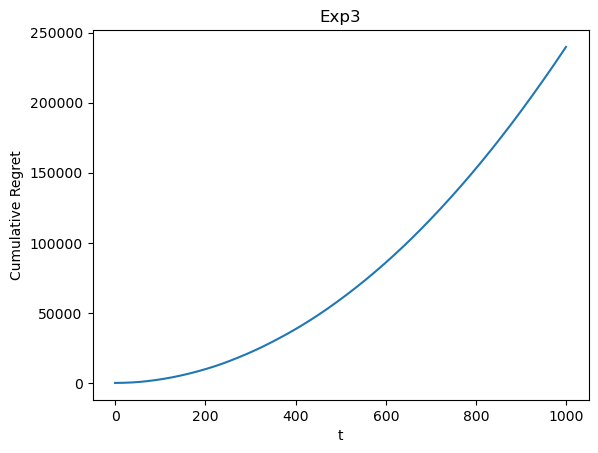

In [2]:
class Exp3:
    def __init__(self, K, eta, n):
        self.K = K
        self.eta = eta
        self.n = n
        self.S_hat = np.zeros(K)
        self.P_hat = np.ones(K) / K
        self.regret = np.zeros(n)
        self.cumulative_regret = None 

    def update(self, xt, index_arm):
        self.S_hat[index_arm] += xt / self.P_hat[index_arm] 
        self.P_hat = np.exp(self.eta * self.S_hat) 
        self.P_hat /= np.sum(self.P_hat)
    
    def select_arm(self):
        return np.random.choice(self.K, p = self.P_hat)
    
    def run(self, rewards):
        regret = np.zeros(self.n)
        for t in range(self.n):
            index_arm = self.select_arm()
            reward = rewards[t, index_arm]
            self.update(reward, index_arm)
            self.regret[t] = np.max(rewards[t, :]) - reward
        self.cumulative_regret = np.cumsum(self.regret)
        
    
def main():
    K = 6
    n = 10 ** 3
    T = 10 ** 2
    eta = np.sqrt(2 * np.log(K) / (n * K))
    rewards = np.random.binomial(1, 0.5, (n, K))
    regret = np.zeros((T, n))
    for t in tqdm(range(T)):
        exp3 = Exp3(K, eta, n)
        exp3.run(rewards)
        regret[t] = exp3.cumulative_regret
    regret = np.mean(regret, axis = 0)
    plt.plot(np.cumsum(regret))
    plt.xlabel('t')
    plt.ylabel('Cumulative Regret')
    plt.title('Exp3')
    plt.show()

if __name__ == '__main__':
    main()

# The NEW algorithm 

$\textbf{Algorithm: Nested Exponential Weights (NEW)}$

\begin{aligned}
&\textbf{Require:} \quad \mathcal{A}: \text{Set of alternatives}, \; \mathcal{S} = \{S_l\}_{l=1}^L: \text{Attribute structure}, \; \mu = \{\mu_1, \dots, \mu_L\} > 0, \; \eta_t \geq 0: \text{Learning rate}, \; n: \text{Number of iterations} \\
&\textbf{Input:} \quad \{r_t\}_{t=1}^n \in [0,1]^{\mathcal{S}}: \text{Sequence of costs} \\
&\textbf{Initialize:} \quad y \leftarrow 0 \in \mathbb{R}^{\mathcal{A}}, \; \hat{S} \leftarrow \{0 \; \forall \; S \in \mathcal{S}\} \\
&\textbf{For } t = 1, \dots, n \textbf{ do:} \\
&\quad \textbf{Scoring Phase:} \\
&\quad \textbf{For } l = L-1 \textbf{ to } 0 \textbf{ do:} \\
&\quad \quad \textbf{For each } S \in S_l: \\
&\quad \quad \quad y_S \leftarrow \mu_{l+1} \cdot \log \left( \sum_{S' \subseteq S} \exp \left( \frac{y_{S'}}{\mu_{l+1}} \right) \right) \\
&\quad \quad \quad \hat{S}[S] \leftarrow 0 \; \text{(Reset baseline guess for class } S\text{)} \\
&\quad \textbf{Selection Phase:} \\
&\quad \textbf{For } l = 1 \textbf{ to } L \textbf{ do:} \\
&\quad \quad \textbf{For each } S \in S_l: \\
&\quad \quad \quad P(S) \leftarrow \frac{\exp \left( \eta_t \cdot \frac{y_S}{\mu_l} \right)}{\sum_{S \in S_l} \exp \left( \eta_t \cdot \frac{y_S}{\mu_l} \right)} \\
&\quad \quad \quad \text{Sample } S \sim P(S) \\
&\quad \quad \quad \text{Observe reward } r_{S,t} \\
&\quad \quad \quad \hat{S}[S] \leftarrow \hat{S}[S] + r_{S,t} \; \text{(Update rewards for class } S\text{)} \\
&\quad \textbf{Update Propensities:} \\
&\quad \textbf{For each } a \in \mathcal{A}: \\
&\quad \quad \hat{c}[a] \leftarrow \sum_{S \ni a} \hat{S}[S] \\
&\quad \quad y[a] \leftarrow y[a] - \hat{c}[a] \\
&\textbf{End For} \\
&\textbf{Output:} \quad \text{Cumulative regret, Updated propensity scores}
\end{aligned}




{'Training': 0, 'SPEED': 1, 'ENDURANCE': 2, 'RECUPERATION': 3, 'short vma': 4, 'hills': 5, 'threshold': 6, 'fartleck': 7, 'cold water': 8, 'footing': 9}


  6%|▌         | 6/100 [00:00<00:03, 23.97it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


  9%|▉         | 9/100 [00:00<00:03, 25.14it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 12%|█▏        | 12/100 [00:00<00:03, 25.17it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 15%|█▌        | 15/100 [00:00<00:03, 25.64it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 21%|██        | 21/100 [00:00<00:03, 26.11it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 24%|██▍       | 24/100 [00:00<00:02, 26.33it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 30%|███       | 30/100 [00:01<00:02, 26.21it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 33%|███▎      | 33/100 [00:01<00:02, 26.04it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 39%|███▉      | 39/100 [00:01<00:02, 25.71it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 42%|████▏     | 42/100 [00:01<00:02, 25.65it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 48%|████▊     | 48/100 [00:01<00:02, 25.27it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 54%|█████▍    | 54/100 [00:02<00:01, 25.44it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 60%|██████    | 60/100 [00:02<00:01, 25.41it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 63%|██████▎   | 63/100 [00:02<00:01, 25.50it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 66%|██████▌   | 66/100 [00:02<00:01, 25.46it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 72%|███████▏  | 72/100 [00:02<00:01, 25.74it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 75%|███████▌  | 75/100 [00:02<00:00, 25.79it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 81%|████████  | 81/100 [00:03<00:00, 25.09it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 84%|████████▍ | 84/100 [00:03<00:00, 25.17it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 87%|████████▋ | 87/100 [00:03<00:00, 25.44it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 93%|█████████▎| 93/100 [00:03<00:00, 25.91it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 96%|█████████▌| 96/100 [00:03<00:00, 26.00it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


100%|██████████| 100/100 [00:03<00:00, 25.63it/s]

End of NEW algorithm


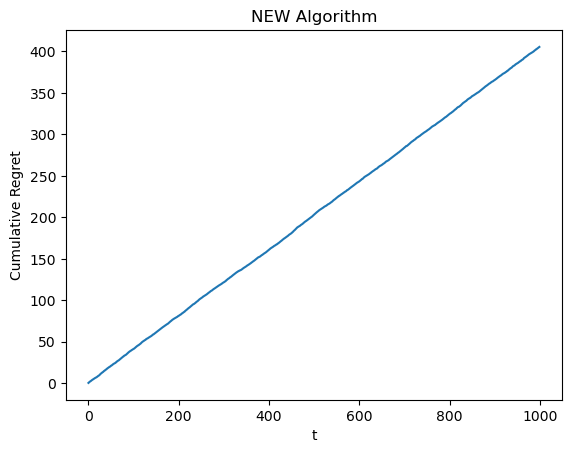

In [8]:
class NEW:
    def __init__(self, A, S, mu, eta, n):
        """
        A: Set of alternatives
        S: Attribute structure (list of levels Sl) 
        mu: List of uncertainty levels μ1, ..., μL > 0
        eta: Learning rate ηt
        n: Number of iterations
        """
        self.A = A
        self.S = S
        self.indices = S.assign_indices()
        self.mu = mu   # we consider mu as fixed for simplicity
        self.eta = eta    # we consider eta as fixed for simplicity
        self.n = n
        self.y = np.zeros(len(A))
        self.r_hat = np.zeros(len(self.S.get_all_nodes()))
        self.regret = np.zeros(n)
        self.cumulative_regret = np.zeros(n)

    def run(self, costs):
        regret = np.zeros(self.n)
        for t in range(self.n):
            # scoring phase 
            self.scoring_phase()

            # selection phase
            path, reward = self.selection_phase(costs[t])

            # loss model
            self.update(reward)

            # Regret computation
            self.compute_regret(reward, costs, t)
        self.cumulative_regret = np.cumsum(self.regret)  
        print("End of NEW algorithm")
            


    def scoring_phase(self):
        # Get all nodes in reverse order of levels
        nodes = self.S.get_all_nodes()
        nodes_by_level = sorted(nodes, key=lambda x: -x.level)

        # Iterate through levels from L-1 to 0
        for node in nodes_by_level:
            if node.children:
                # Compute y_S using children scores
                exp_scores = np.array([np.exp(child.value / self.mu) for child in node.children])
                log_sum_exp = np.log(exp_scores.sum())
                node.value = self.mu * log_sum_exp + self.mu
            
    
    def selection_phase(self, cost):
        path = []
        current_node = self.S.root

        while current_node.children:
            # Compute probabilities for current node's children
            children = current_node.children
            scores = np.array([child.value for child in children])
            exp_scores = np.exp(self.eta * scores / self.mu)
            probabilities = exp_scores / exp_scores.sum()

            # Select child based on probabilities
            selected_index = np.random.choice(len(children), p = probabilities)
            selected_node = children[selected_index]
            indice_cost = self.indices[selected_node.name]
            r = cost[indice_cost]
            self.r_hat[indice_cost] = r
            
            # Update path and current node
            path.append(selected_node.name)
            current_node = selected_node

        # Get the reward for the selected leaf
        leaf_index = self.indices[current_node.name]
        reward = cost[leaf_index]

        return path, reward
    
    def update(self, reward):
        for node in self.S.get_all_nodes():
            if node.children: 
                index = self.indices[node.name]
                self.y[index] -= self.r_hat[index]
                self.r_hat[index] = reward

    def compute_regret(self, reward, costs, t):
        optimal_reward = max(costs[t])   # Assume optimal reward is max
        self.regret[t] = (optimal_reward - reward)

        
        



def main():
    A = np.arange(6)  # Alternatives : "short vma", "hills", "threshold", "fartleck", "cold water", "footing"
    S = Tree()
    root = S.insert(None, ('Training', 0.0))
    SPEED, _ = S.insert(root, ('SPEED', 0.4))
    ENDURANCE, _ = S.insert(root, ('ENDURANCE', 0.8))
    RECUPERATION, _ = S.insert(root, ('RECUPERATION', 0.2))
    S.insert(SPEED, ('short vma', 0.5))
    S.insert(SPEED, ('hills', 0.5))
    S.insert(ENDURANCE, ('threshold', 0.8))
    S.insert(ENDURANCE, ('fartleck', 0.7))
    S.insert(RECUPERATION, ('cold water', 0.1))
    S.insert(RECUPERATION, ('footing', 0.4))
    print(S.assign_indices())
    L = 2
    n_l = 2
    Rl_bar = 1    # We assume R_S = 1
    n_eff = (L * np.sqrt(n_l) * Rl_bar) ** 2
    mu = np.sqrt(n_eff / 2)     # sqrt(n_eff / 2)
    n = 10 ** 3  # Number of iterations
    T = 10 ** 2  # Number of simulations
    eta = 0.1  # Learning rate
    rewards = np.random.uniform(0, 1, size = (n, len(S.assign_indices())))  # Random costs in [0,1]
    regret = np.zeros((T, n))
    for t in tqdm(range(T)):
        new_algorithm = NEW(A, S, mu, eta, n)
        new_algorithm.run(rewards)
        regret[t] = new_algorithm.cumulative_regret
    
    avg_regret = np.mean(regret, axis=0)
    plt.plot(avg_regret)
    plt.xlabel('t')
    plt.ylabel('Cumulative Regret')
    plt.title('NEW Algorithm')
    plt.show()

if __name__ == "__main__":
    main()

{'Training': 0, 'SPEED': 1, 'ENDURANCE': 2, 'RECUPERATION': 3, 'short vma': 4, 'hills': 5, 'threshold': 6, 'fartleck': 7, 'cold water': 8, 'footing': 9}


  4%|▍         | 4/100 [00:00<00:04, 19.61it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


  6%|▌         | 6/100 [00:00<00:04, 19.65it/s]

End of NEW algorithm
End of NEW algorithm


  9%|▉         | 9/100 [00:00<00:04, 19.88it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 11%|█         | 11/100 [00:00<00:04, 18.33it/s]

End of NEW algorithm


 17%|█▋        | 17/100 [00:00<00:04, 18.78it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 25%|██▌       | 25/100 [00:01<00:03, 19.75it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 33%|███▎      | 33/100 [00:01<00:03, 19.93it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 41%|████      | 41/100 [00:02<00:02, 19.95it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 50%|█████     | 50/100 [00:02<00:02, 19.61it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 55%|█████▌    | 55/100 [00:02<00:02, 19.84it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 61%|██████    | 61/100 [00:03<00:01, 20.01it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 67%|██████▋   | 67/100 [00:03<00:01, 20.08it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 76%|███████▌  | 76/100 [00:03<00:01, 20.20it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 82%|████████▏ | 82/100 [00:04<00:00, 20.17it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 89%|████████▉ | 89/100 [00:04<00:00, 19.63it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


 95%|█████████▌| 95/100 [00:04<00:00, 18.94it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


100%|██████████| 100/100 [00:05<00:00, 19.64it/s]

End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm
End of NEW algorithm


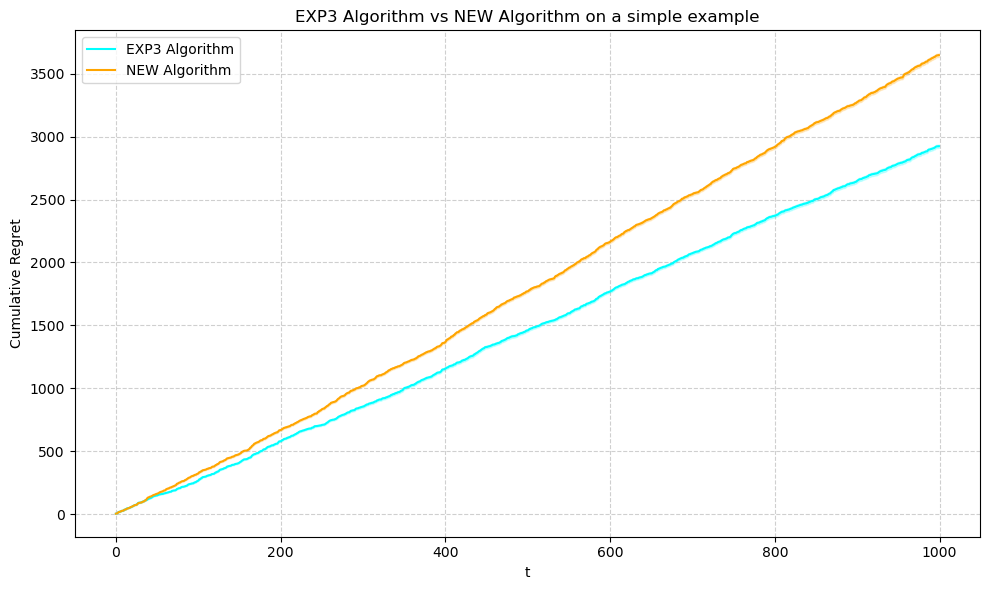

In [6]:
A = np.arange(6)  # Alternatives : "short vma", "hills", "threshold", "fartleck", "cold water", "footing"
L = 2
n_l = 2
Rl_bar = 1    # We assume R_S = 1
n_eff = (L * np.sqrt(n_l) * Rl_bar) ** 2
mu = np.sqrt(n_eff / 2)     # sqrt(n_eff / 2)
n = 10 ** 3  # Number of iterations
T = 10 ** 2  # Number of simulations
eta = 0.1  # Learning rate


S = Tree()
root = S.insert(None, ('Training', 0.0))
SPEED, _ = S.insert(root, ('SPEED', 0.3))
ENDURANCE, _ = S.insert(root, ('ENDURANCE', 0.8))
RECUPERATION, _ = S.insert(root, ('RECUPERATION', 0.2))
S.insert(SPEED, ('short vma', 0.5))
S.insert(SPEED, ('hills', 0.5))     # the idea is that doing a short vma or hills training is the same for the learner 
S.insert(ENDURANCE, ('threshold', 0.8))
S.insert(ENDURANCE, ('fartleck', 0.7))
S.insert(RECUPERATION, ('cold water', 0.1))
S.insert(RECUPERATION, ('footing', 0.3))
print(S.assign_indices())

def generate_random_rewards(n, S):
    rewards = np.zeros((n, len(S.assign_indices())))
    for i in range(n):
        for j in range(len(S.assign_indices())):
            prob = np.random.rand()
            if prob < 1 / 3:
                rewards[i, j] = np.random.uniform(0, 1) 
            elif prob < 2 / 3:
                rewards[i, j] = np.random.normal(0, 1)
            else:
                rewards[i, j] = np.random.normal(0, 4)
    return rewards


rewards_NEW = generate_random_rewards(n, S)  # Random costs in [0,1]
rewards_EXP3 = rewards_NEW[:, 3:]

regret_NEW = np.zeros((T, n))
regret_EXP3 = np.zeros((T, n))

for t in tqdm(range(T)):
    # EXP3
    exp3_algorithm = Exp3(len(A), eta, n)
    exp3_algorithm.run(rewards_EXP3)
    regret_EXP3[t] = exp3_algorithm.cumulative_regret

    # NEW
    new_algorithm = NEW(A, S, mu, eta, n)
    new_algorithm.run(rewards_NEW)
    regret_NEW[t] = new_algorithm.cumulative_regret

avg_regret_exp3 = np.mean(regret_EXP3, axis=0)
var_regret_exp3 = np.var(regret_EXP3, axis=0)

avg_regret_NEW = np.mean(regret_NEW, axis=0)
var_regret_NEW = np.var(regret_NEW, axis=0)

conf_interval_exp3 = 1.96 * np.sqrt(var_regret_exp3 / T)
conf_interval_NEW = 1.96 * np.sqrt(var_regret_NEW / T)


plt.figure(figsize = (10, 6))

# EXP3
plt.plot(avg_regret_exp3, label='EXP3 Algorithm', color='cyan')
plt.fill_between(
    range(len(avg_regret_exp3)),
    avg_regret_exp3 - conf_interval_exp3,
    avg_regret_exp3 + conf_interval_exp3,
    color='cyan',
    alpha=0.2
)

# NEW
plt.plot(avg_regret_NEW, label='NEW Algorithm', color='orange')
plt.fill_between(
    range(len(avg_regret_NEW)),
    avg_regret_NEW - conf_interval_NEW,
    avg_regret_NEW + conf_interval_NEW,
    color='orange',
    alpha=0.2
)

plt.xlabel('t')
plt.ylabel('Cumulative Regret')
plt.title('EXP3 Algorithm vs NEW Algorithm on a simple example')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Peu de similarités dans les options ... Modifions légèrement l'exemple.

Problèmes : 
- L'algorithme discrimine mal lorsqu'une solution est vraiment optimale. 
- Nécessité de connaître la structure. 